<a href="https://colab.research.google.com/github/ThapaVinay/Handwritten_Digit_Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# getting the data from the google drive

X_train = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/train_X.csv', delimiter=',').T
Y_train = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/train_label.csv', delimiter=',').T

X_test = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/test_X.csv', delimiter=',').T
Y_test = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/test_label.csv', delimiter=',').T

In [3]:
print("Shape of X_train :", X_train.shape)  # 28 * 28 pixels as input
print("Shape of Y_train :", Y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (784, 1000)
Shape of Y_train : (10, 1000)
Shape of X_test : (784, 350)
Shape of Y_test : (10, 350)


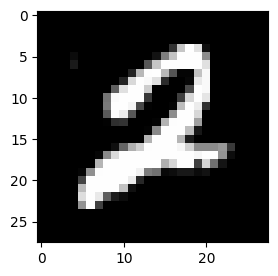

In [4]:
index = random.randrange(0, X_train.shape[1])
plt.figure(figsize=(3, 3))  # value is in inches
plt.imshow(X_train[:, index].reshape(28, 28), cmap='gray')  # convert the vector to 28*28 pixel values
plt.show()



## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$


In [5]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(0,x)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX)

In [6]:
def derivative_tanh(x):
  return (1 - np.power(x,2))

def derivative_relu(x):
  return np.array(x > 0, dtype=np.float32)



# Initialise Parameters

In [8]:
def initialse_parameters(n_x, n_h, n_y):
  w1 = np.random.randn(n_h, n_x)*0.01
  b1 = np.zeroes(n_h,1)

  w2 = np.random.randn(n_y, n_h)*0.01
  b2 = np.zeroes(n_y,1)

  parameters = {
      "w1" : w1,
      "b1" : b1,
      "w2" : w2,
      "b2" : b2,
  }

  return parameters

# Forward propagation

In [7]:
def forward_propagation(x, parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']

  w2 = parameters['w2']
  b2 = parameters['b2']

  z1 = np.dot(w1, x) + b1
  a1 = relu(z1)

  z2 = np.dot(w2, a1) + b2
  a2 = softmax(z2)

  forward_cache = {
      'z1' : z1,
      'a1' : a1,
      'z2' : z2,
      'a2' : a2
  }
  return forward_cache